In [1]:
import random
random.seed(0)
print(random.randint(0,3))

3


In [10]:

deaths = [sum([random.sample(range(4),4).index(random.randint(0,3)) for i in range(4)]) for i in range(100000)]
sum(deaths)/100000

5.99145

In [11]:
dist = dict()
for i in range(13) :
    dist[i] = 0 

In [12]:
for n in deaths :
    dist[n] += 1

In [13]:
for n in dist.values() :
    print(n)

382
1586
3846
7846
12228
15653
17369
15512
12011
7729
3875
1601
362


In [15]:
!python -m pip install matplotlib

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.0 MB 7.6 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/8.0 MB 4.8 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.0 MB 5.2 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.0 MB 5.8 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.0 MB 5.5 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.0 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 7.7 MB/s eta 0:00:01
   -------------------------------------- - 2.1/2.2 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---- ------------------------

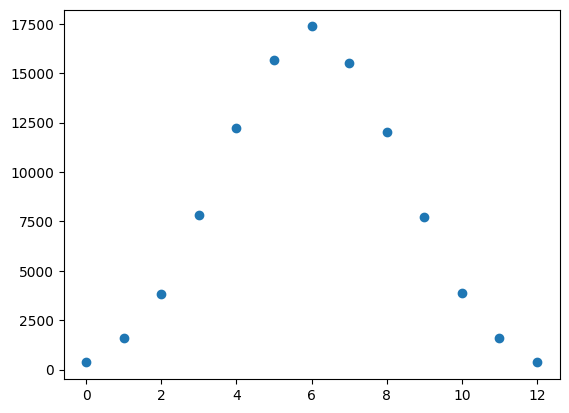

In [16]:
import matplotlib.pyplot as plt

x = dist.keys()
y = dist.values()
plt.scatter(x,y)

In [27]:
def lps(n,m) :
    people = list(range(n))
    position = 0
    while len(people) > 1 :
        position = (position + m) % len(people)
        people.pop(position)
    return people[0]
    
        
        

In [32]:
lps(250,7)

203

$lps : \cal{N} \times (\cal{N} \rightarrow T) \rightarrow T$ 

In [10]:
def pop(f,i) :
    f.pop(i)

In [11]:
def lps(m,people,cursor=0) :
    if len(people) == 1 :
        return people[0]
    cursor = (cursor + m) % len(people)
    pop(people,cursor)
    return lps(m,people,cursor)



### example 1

In [15]:
lps(7,list(range(250)))

203

### example 2

In [18]:
import string
lps(5,list(string.ascii_lowercase))


'j'

'abcdefghijklmnopqrstuvwxyz'

203

> **pop** : $(A \rightarrow B) \times A \rightarrow (A \rightarrow B)$
> 
> *input* : $f \in (A \rightarrow B)$ , $a \in A$ \
> *output* : $ \in (A \rightarrow B)$
>
> **return** $f \setminus (a,f(a))$

> **lps** : $I \times (I \rightarrow T) \rightarrow T$
> 
>
> *initialise* : $I = \left\{0,1,\dots,n-1\right\}$ with $n \in \cal{N}$ and $n > 0$ , $cursor \in I$ , $cursor = 0$   \
> *input* : $m \in I$ , $positions \in (I \rightarrow T)$  \
> *output* : $ \in T$
>
> **if** $|positions| = 1$  **return** $positions(0)$ \
> $cursor \leftarrow (cursor + m)({\bf mod} |positions|)$ \
> $positions \leftarrow {\bf pop}(cursor,positions)$ \
> **return** ${\bf lps}(m,positions)$

> **Algorithm** parameters: step size  $\alpha \in (0 , 1] , \epsilon > 0$   
Initialize  $Q  ( s, a ), \  \forall s \in S^+ , a \in A ( s ),$ arbitrarily except that $Q ( terminal , \cdot ) = 0$    
>
> Loop for each episode:  
$\quad$Initialize $S$   
$\quad$Loop  for  each  step  of  episode:    
$\qquad$Choose  $A$ from $S$ using some policy derived from $Q$ (eg $\epsilon$-greedy)   
$\qquad$Take action $A$, observe $R, S'$   
$\qquad Q(S,A) \leftarrow Q(S,A) + \alpha[R+\gamma \max_a(S', a) - Q(S, A)]$   
$\qquad S \leftarrow S'$    
$\quad$ until $S$ is terminal

> Algorithm parameters: step size  $\alpha \in (0 , 1] , \epsilon > 0$   
Initialize  $Q  ( s, a ), \  \forall s \in S^+ , a \in A ( s ),$ arbitrarily except that $Q ( terminal , \cdot ) = 0$    
>
> Loop for each episode:  
$\quad$Initialize $S$   
$\quad$Loop  for  each  step  of  episode:    
$\qquad$Choose  $A$ from $S$ using some policy derived from $Q$ (eg $\epsilon$-greedy)   
$\qquad$Take action $A$, observe $R, S'$   
$\qquad Q(S,A) \leftarrow Q(S,A) + \alpha[R+\gamma \max_a(S', a) - Q(S, A)]$   
$\qquad S \leftarrow S'$    
$\quad$ until $S$ is terminal